# Declaration of Originality

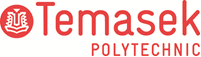

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Yip Jun On Ethan (2400197F)
* Tutorial Group                : TC02
* Tutor						    : Ester GOH
* Submission Date               : 11 February 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [77]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding
Goal: The goal of this project is to predict different passenger's flight satisfaction in order to identify the most important service factors, so that the airline would be able to make the necessary improvements to increase the impact on customer loyalty and experience

This all matters greatly as the passenger flight satisfaction is able to affect the brand's reputation and repeat business. Understanding which services have the most impact on customer satisfactions, will actually allow the airline to cut cost and time having to search or fund for the different types of services that might be it.

# 2. Data Understanding

## 2.1 Load dataset

In [78]:
FILE_PATH = 'MLDP_Flight_Satisfaction_Final.csv'

In [79]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv(FILE_PATH)
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [80]:
## Drop unnecessary data from the dataframe
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df 

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In this step of the project, I have decided to drop certain columns from the dataframe that I deemed to be unnecesary for my predictions, such as the "id" and "Unnamed: 0" columns. As shown in the above output, both the said columns have been successfully dropped.

## 2.2 Summary Statistics

In [81]:
## Understand the type of variable for each column

df.dtypes

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [82]:
## Check for missing data
df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [83]:
## Describe data distribution
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [84]:
## Describe data distribution
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,25976,25976,25976,25976,25976
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,13172,21177,18038,12495,14573


As I was doing this step, I have decided to make use of both the df.describe() and df.describe(include='object') commands instead of simply using df.describe(include='all') which is able to display both the numerical and categorical statistics in one singular output.

I had decided to go with this approach of using 2 separate commands as firstly, it was still able to return me both the numerical (columns including numerical data) and categorical (columns like "gender", and "Customer type") statistics, but now in smaller outputs, making it slightly easier for me to read. 

Secondly, I realised that when I was using a command like df.describe(include='all'), it actually might have been slightly harder for me to read due to the larger output and the fact that the NaN values were also displayed.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

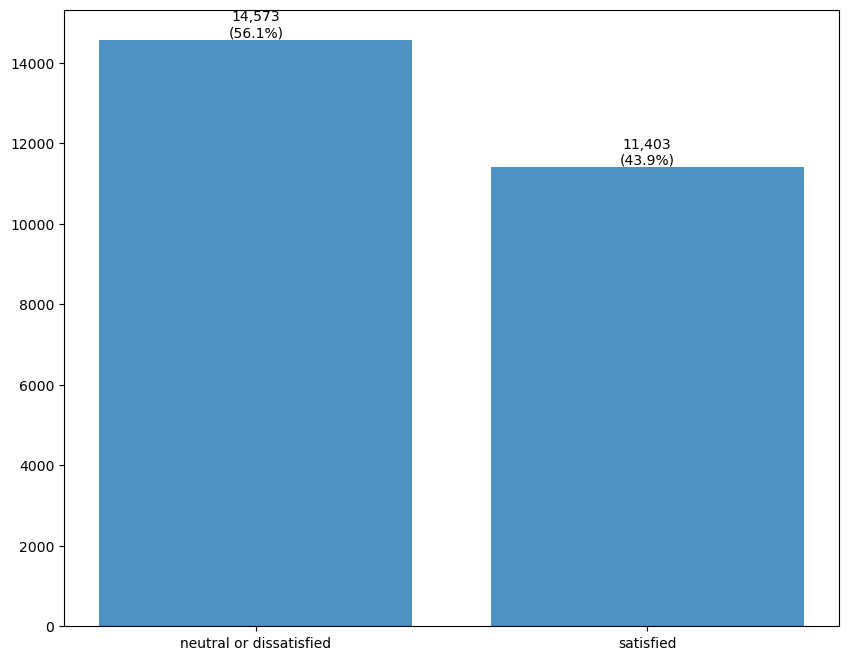

In [85]:
## Understanding distribution of target

# creating the figure and axis
fig, ax = plt.subplots(figsize=(10, 8)) 
counts = df['satisfaction'].value_counts()
total = counts.sum()

# creating the bar plot
bars = ax.bar(counts.index, counts.values, linewidth=1.2, alpha=0.8)  # Changed plt to ax

# adding the labels
labels = [f'{int(count):,}\n({count/total*100:.1f}%)' for count in counts.values]
ax.bar_label(bars, labels=labels);


As we are dealing with categorical data ("satisfied" and "neutral or dissatisfied") in our target column, I have decided that the best option would be to use a Bar Chart to help us visualise the distribution of the target within our dataset. 

I had made use of the ax.bar_label() function from matplt to help set the label for the bar chart, it helps us to see that the total number of satisfied customers were 11,403, while the total number of neutral or dissatisfied customers were 14,573.

Not to mention, it helps us to see that the target distribution is balanced over the 2 unique values ("neutral or dissatisfied" and "satisfied"), with 56% of the target going to neutral or dissatisfied while the remaining 44% goes to customers that are satisfied.

### 2.3.1.2 Understanding distribution of features

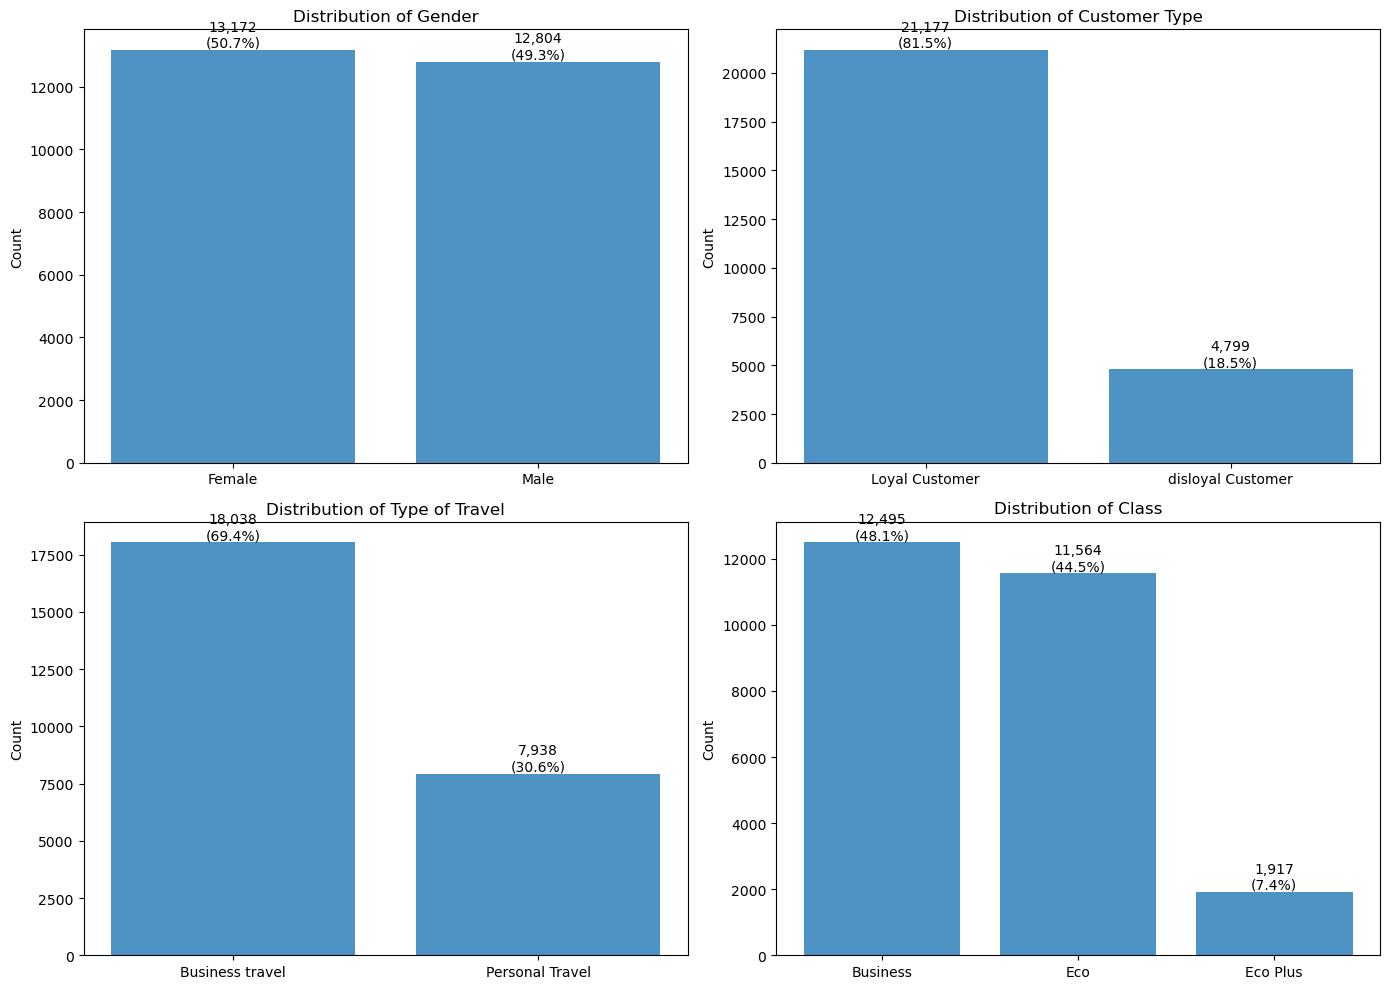

In [ ]:
# Understanding distribution of features (Categorical Features)

# List of categorical columns
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() # making sure that the axes are not in 2D array so that it is easier to loop through

# Loop through each categorical column and plot
for i, col in enumerate(cat_cols):
    counts = df[col].value_counts()
    total = counts.sum()
    bars = axes[i].bar(counts.index, counts.values, linewidth=1.2, alpha=0.8) # plots a bar chart
    labels = [f'{int(count):,}\n({count/total*100:.1f}%)' for count in counts.values] # labels of the bars
    axes[i].bar_label(bars, labels=labels)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count') 

plt.tight_layout() # ensures the layout does not overlap with the rest of the figure
plt.show() 

In this step, I was able to find out the distribution of my categorical features (Gender, Customer Type, Type of Travel, and Class) to understand the class balance, identify any dominant categories, and detect potential bias in the dataset. 

These are the observations that I have made:
For the genders, I could tell that they were well balanced, with them almost achieving a perfect 50/50 split. This indicates that there are not any strong gender imbalances within this dataset.

As for the customer types, I was able to easily tell right away that there was a large difference between the number of loyal customers to disloyal customers. With the loyal customers dominating at around 81%, while the disloyal customers hover at around 19%. Knowing this allows me to deduce that the models might actually learn more from the majority group, which in this case would be the "Loyal customer".

As for the types of travel, it is definitely similar to the customer types as there also seems to be some sort of imbalance, though it is not really as extreme as the customer types. I can see that the number of business travels to the number of personal travels is sitting at around 69% to 31% respectively. This also suggests that the models we use might learn more from the majority group.

Lastly, for the distribution of classes, I was able to see that both the Business class and the Eco class were looking balanced, however, there is another class called Eco Plus that is actually at around 7%. Since it is so different from the rest of the other classes within this column. It suggests that the predictions regarding that class might actually be less accurate.

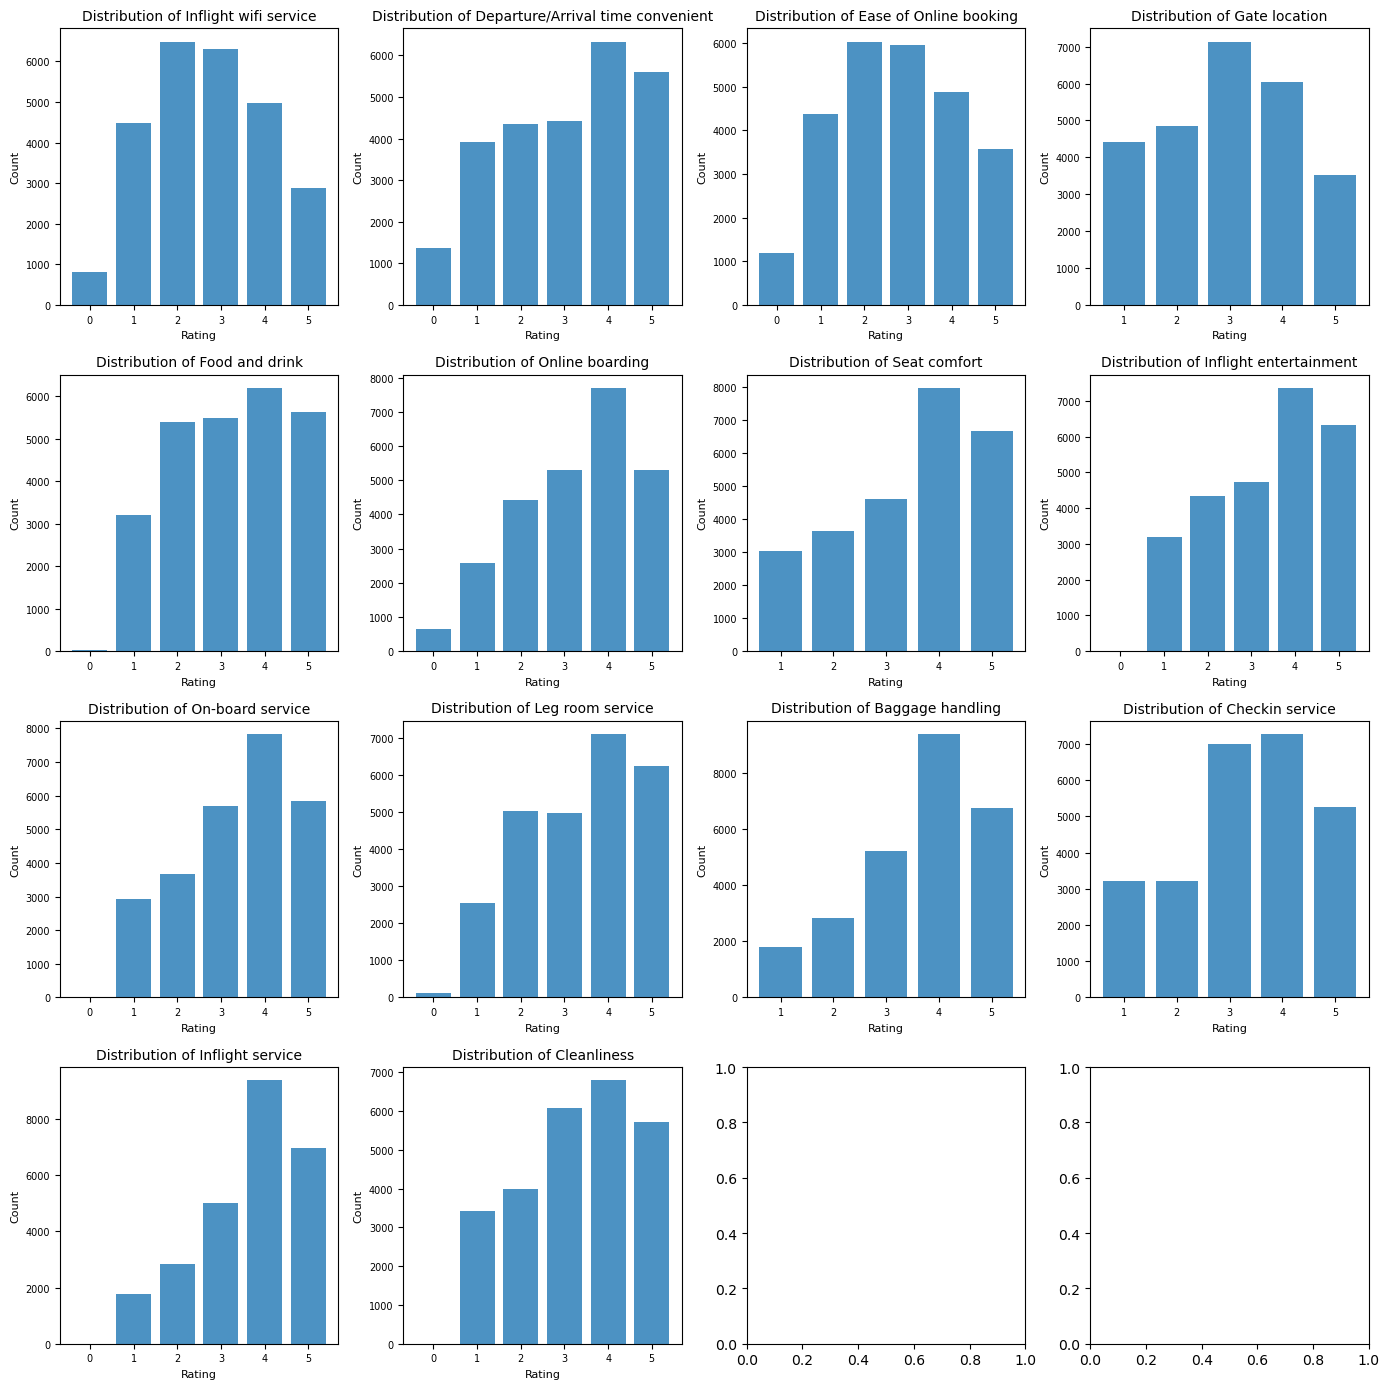

In [87]:
# Understanding dostribution of features (Rating features)

# List of rating columns
rating_cols = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
 ]

fig, axes = plt.subplots(4, 4, figsize=(14, 14))
axes = axes.flatten() # making sure that the axes are not in 2D array so

# Loop through each rating column and plot
for i, col in enumerate(rating_cols):
    counts = df[col].value_counts().sort_index()
    total = counts.sum()
    bars = axes[i].bar(counts.index, counts.values, linewidth=1.2, alpha=0.8) # plots a bar chart
    axes[i].set_title(f'Distribution of {col}', fontsize=10, pad=6)
    axes[i].set_xlabel('Rating', fontsize=8)
    axes[i].set_ylabel('Count', fontsize=8)
    axes[i].tick_params(axis='x', labelsize=7)  # shrink tick labels to avoid overlap
    axes[i].tick_params(axis='y', labelsize=7)
plt.tight_layout() # ensures the layout does not overlap with the rest of the figure
plt.show()


In this next step, I had decided that it would be good to also visualise the "rating" features as well. This would allow me to have a better idea of how the service ratings are distributed and how they may affect things. I had decided to use bar charts for these visualisations as Bar Charts are good for visualising categorical data like these. (Since they all range from values 0 to 5).

Here are the observations that I have made:
- I actually first noticed that most of the ratings are concentrated around the 3–5 range, with there being fewer ratings between the 1–2 range. This suggests a generally positive service feedback overall across these features. 

- However, another observation that I had made was that it actually related to the previous observation, was that a lot of the features shown above actually are skewed as there are a lot more higher ratings compared to lower ratings. This might cause some issues down the line especially as it might cause the model to react less to the lower ratings as it has not been seen as often. (Meaning that lower ratings might not actually drop the probability as much)

- I also noticed that there were some features that had the "0" value included, though it was never specified in the dataset what 0 meant, this detail was still interesting to take note of, as it might end up negatively affecting the mean by bringing it down or even giving the impression that 0 means "Super Dissatisfied". 

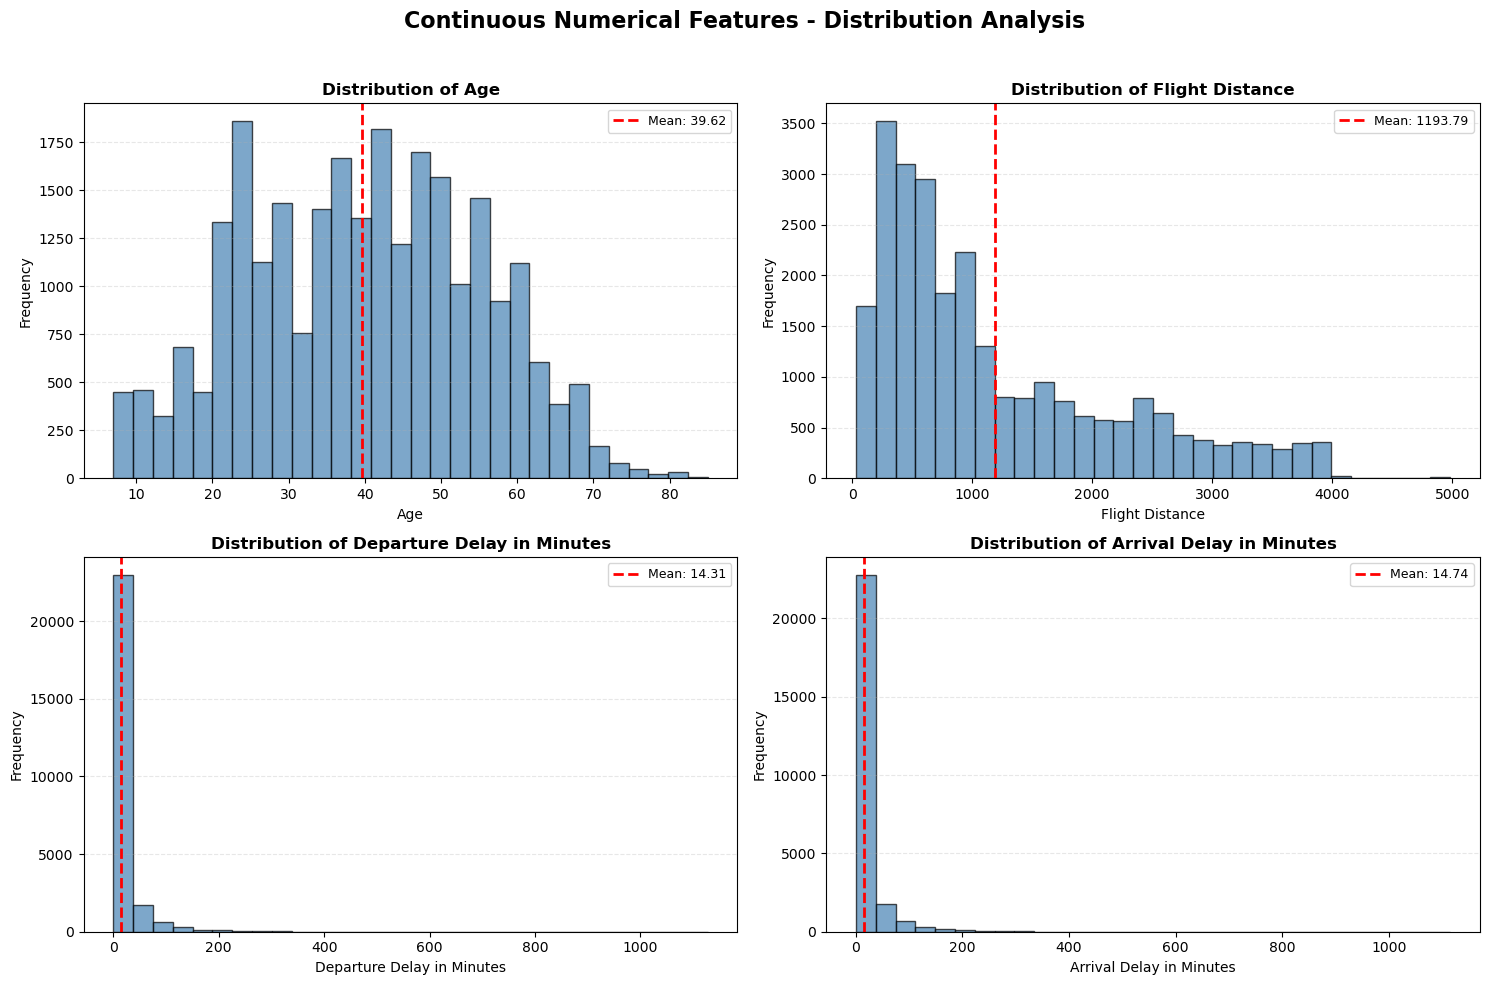

In [88]:
# Understanding distribution of features (Numerical Features)

# 1. Filter features: Keep only numerical columns with more than 10 unique values
# This automatically removes the 1-5 rating scales
continuous_features = [
    col for col in df.select_dtypes(include=["number"]).columns 
    if df[col].nunique() > 10
]

# 2. Setup the plotting grid based on the filtered list
cols = 2  # Reduced columns for better visibility of wider distributions
rows = (len(continuous_features) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for idx, feature in enumerate(continuous_features):
    # Drop NaNs for the calculation
    data = df[feature].dropna()
    
    # Plot histogram
    axes[idx].hist(data, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    
    # Add mean line
    mean_val = data.mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', 
                      linewidth=2, label=f'Mean: {mean_val:.2f}')
    
    # Formatting
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].legend(fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')

# Hide any empty subplots
for ax in axes[len(continuous_features):]:
    ax.axis('off')

plt.suptitle('Continuous Numerical Features - Distribution Analysis', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In this step, I have made use of a histogram to better understand the distribution of my numerical columns as histograms are known to be great for visualising numerical data. I had also included a mean line that is represented by the red dotted line. The purpose of that is to help me visualise where exactly the average line is in each of these features, which can be great also to see if the data is right-skewed or not.

Through this visualisation, I observed the following things:
- The age is roughly centered at around 40 and is not heavily skewed at all. 
- As for the flight distance, I can tell that it was right-skewed and with a long tail. It tells me that there are a lot of shorter flights but not as much longer flights. 
- As for both the departure and arrival delay in minutes, they both are super right skewed. This tells me that there are a lot of flights with very minimal delay, as well as less flights that have a higher delay in minutes for both the departure and arrival. 

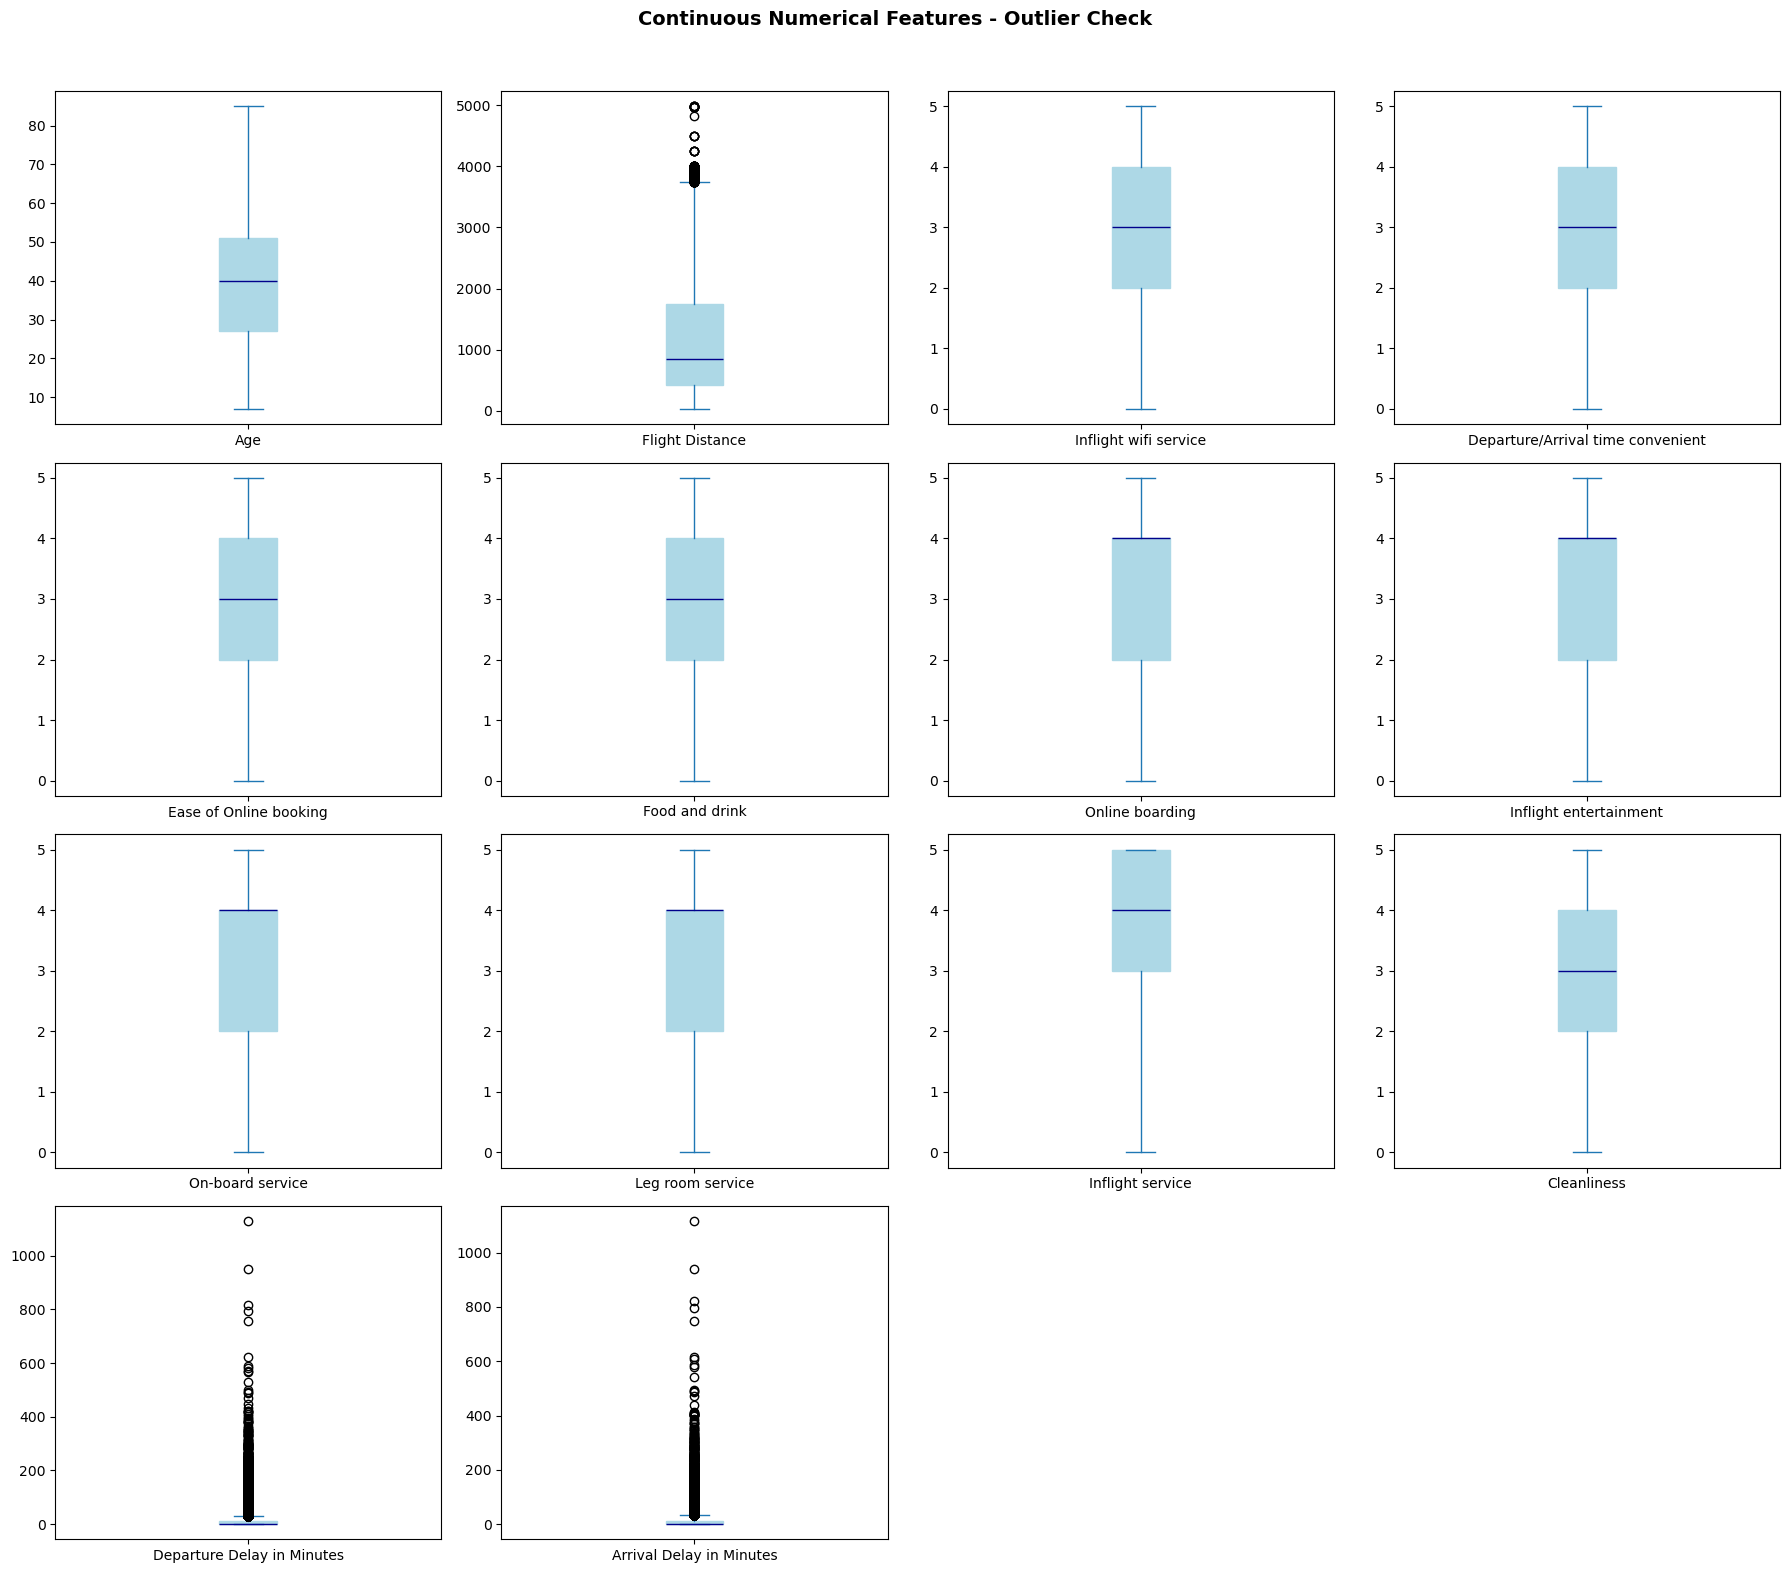

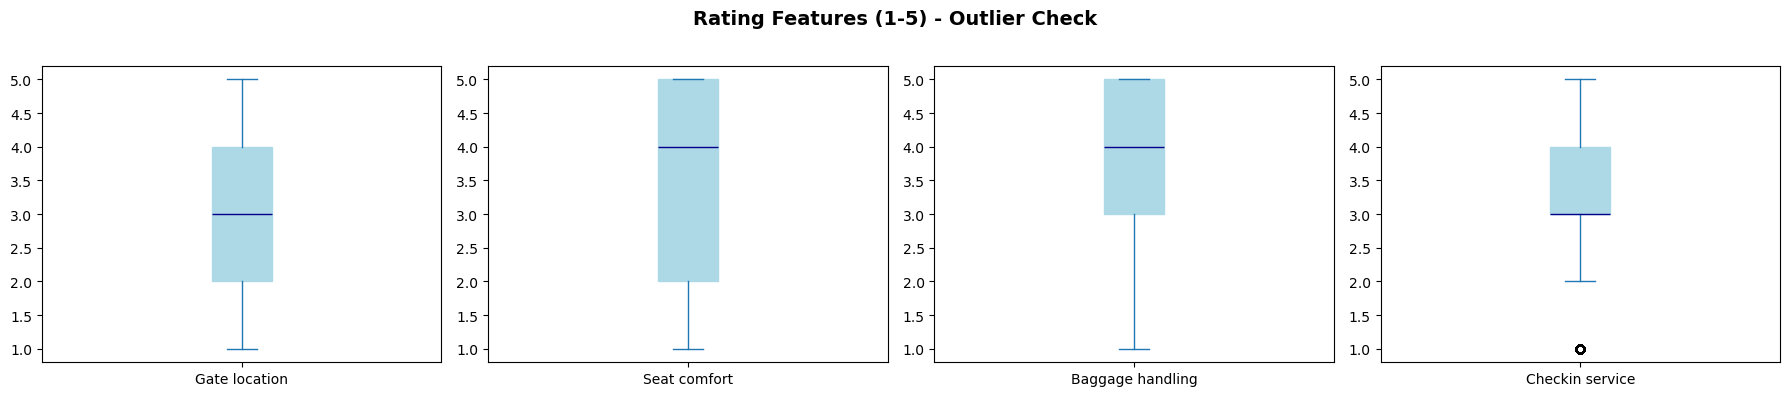

In [89]:
# Outlier detection using box plots
numerical_features = df.select_dtypes(include=["number"]).columns.tolist()
rating_features = [
    col for col in numerical_features
    if df[col].dropna().between(1, 5).all() and df[col].nunique() <= 5
 ]
continuous_features = [col for col in numerical_features if col not in rating_features]

def plot_box_grid(features, title):
    if not features:
        print(f"No features categorized as {title.lower()}.")
        return
    cols = min(4, len(features))
    rows = (len(features) + cols - 1) // cols
    df[features].plot(kind='box',
                      subplots=True,
                      layout=(rows, cols),
                      figsize=(18, 4 * rows),
                      patch_artist=True,
                      color=dict(boxes='lightblue', medians='darkblue'))
    plt.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_box_grid(continuous_features, 'Continuous Numerical Features - Outlier Check')
plot_box_grid(rating_features, 'Rating Features (1-5) - Outlier Check')

In this step, I had made use of boxplots to help me perform outlier checks on my numerical features as well as my rating features. I had decided to make use of boxplots as they are able to quickly let me visualise the median, spread and most importantly, outliers for each of the features above.

Here are some of the key observations that I have made, since the output is too large:
- A lot of outliers can be seen in features such as flight distance, departure, and arrival delay in minutes. These outliers can actually sevrely affect the mean value of their respective features as some of them are actually quite extreme. 
- As for the outliers, I could also tell that for both the departure and arrival delay in minutes, they would lead to really dissatisfied experiences as higher delays would mean a worse experience overall.
- As these outliers are actually considered quite meaningful, I am able to understand that I should not be focusing too strongly on just automatically removing them, but to handle them more carefully.
- Most rating features are bounded quite tightly around the 1–5 range with a relatively small spread and only a few low outliers (e.g. the checkin service, with just one singular outlier ), this tells me that the rating data is generally consistent and most likely would not require much cleaning. (except for when handling the “0" values).

### 2.3.2 Understanding relationship between variables

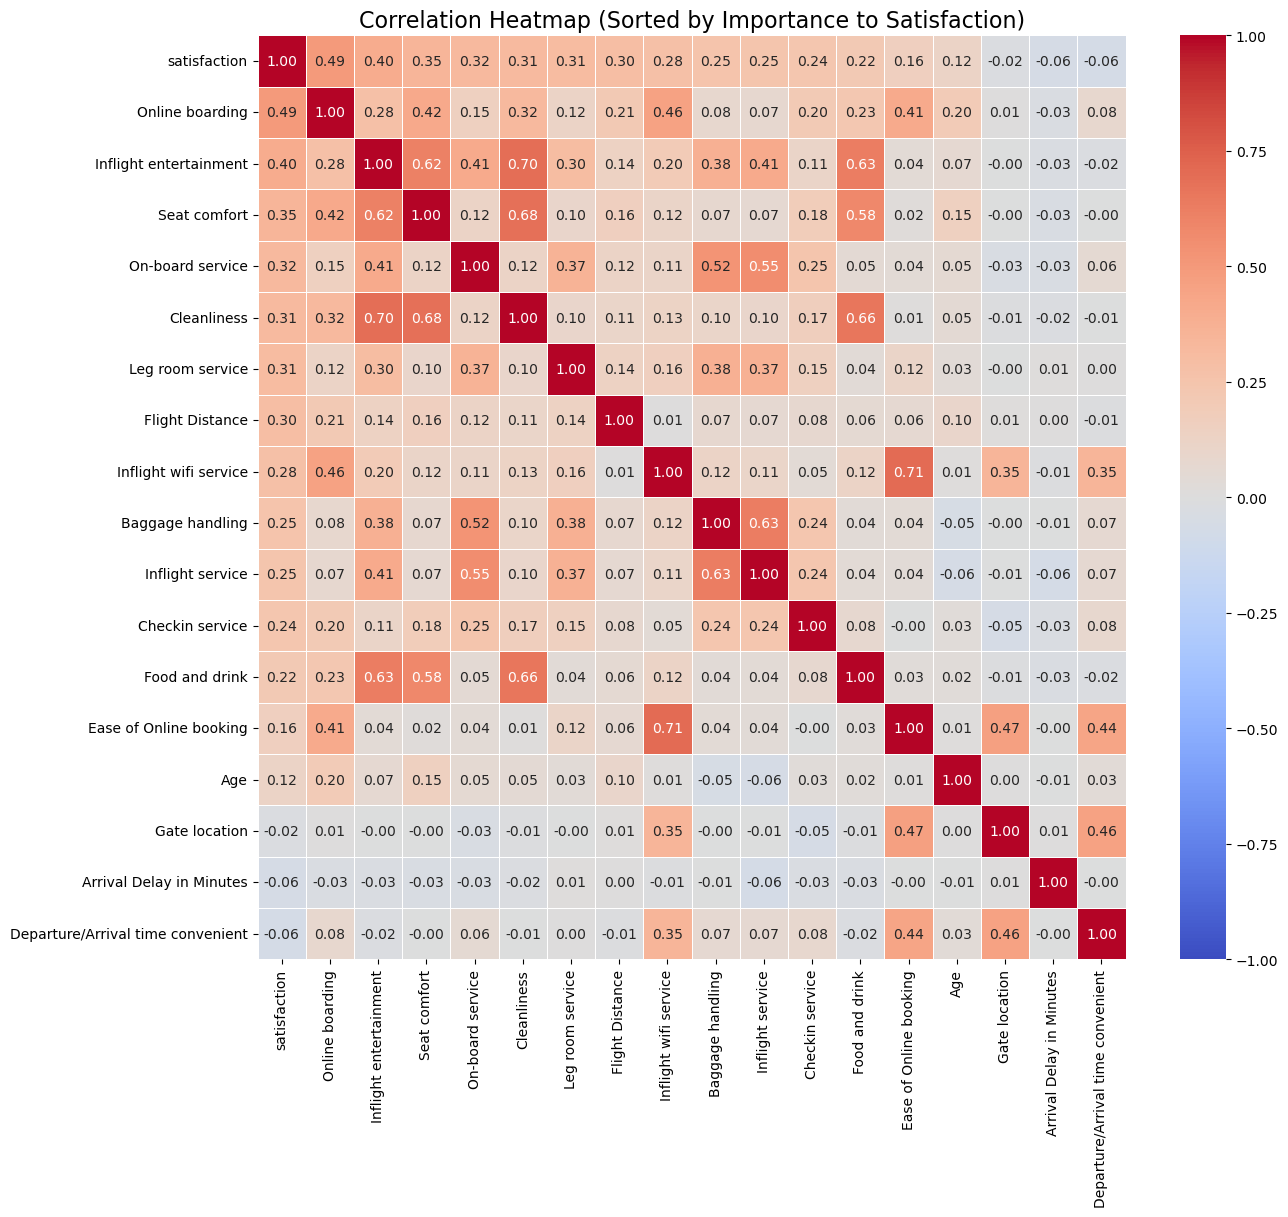

In [90]:
## Understanding relationship between variables (Heatmap)
# Correlation heatmap (sorted by relevance to target) - Pearson

# 1. Create a temporary copy for visualization to protect the original data
df_viz = df.copy()

# 2. Encode the target variable 'satisfaction'
# We map 'satisfied' to 1 and 'neutral or dissatisfied' to 0
df_viz['satisfaction'] = df_viz['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# 3. Drop redundant columns
# 'Departure Delay' is usually 99% correlated with 'Arrival Delay'. We only need one.
# We also drop the remaining categorical columns (Gender, etc.) as they don't work in a standard correlation heatmap
df_viz = df_viz.drop(columns=['Departure Delay in Minutes'])
numeric_df = df_viz.select_dtypes(include=['number'])

# 4. Calculate Correlation
corr_matrix = numeric_df.corr()

# 5. SORTING (The crucial step for "Relevance")
# This sorts the matrix columns/rows by their correlation with 'satisfaction'
# so the most important features are grouped together at the top/left.
cols_sorted = corr_matrix.nlargest(len(numeric_df.columns), 'satisfaction')['satisfaction'].index
sorted_corr = numeric_df[cols_sorted].corr()

# 6. Plot the Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(sorted_corr, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            vmin=-1, vmax=1, 
            linewidths=0.5)

plt.title('Correlation Heatmap (Sorted by Importance to Satisfaction)', fontsize=16)
plt.show()


Over here, I had made use of a heatmap to help me to understand the relationship between my variables. I had decided upon using the correlation heatmap as it is able to summarise all of the pairwise relationships at once, allowing me to make more meaningful observations within my dataset easily.

Key observations that I had made:   
- The first observation that I had made was that there are multiple features in this dataset that is considered moderately positively correlated to the target (satisfaction). Such features would include, Online Boarding, Seat comfort, and inflight entertainment. (This could be seen through the colours of the heat map)

- The second point is that some of the features are actually highly correlated with one another. One example would be Online booking + Ease of online booking. These two features have a strong positive correlation of around 0.7, and actually suggests that having 2 separate features for something so related might actually be a little redundant. Instead, this brings the idea of maybe combining them in a later step down the line.

- There were also some pretty surprising positive correlations between some of the features. For example, cleanliness and inflight entertainment. Those two features have a positive correlation of 0.7 and allows me to think deeper into their relationship in order to potentially merge them together into one feature during a later stage.

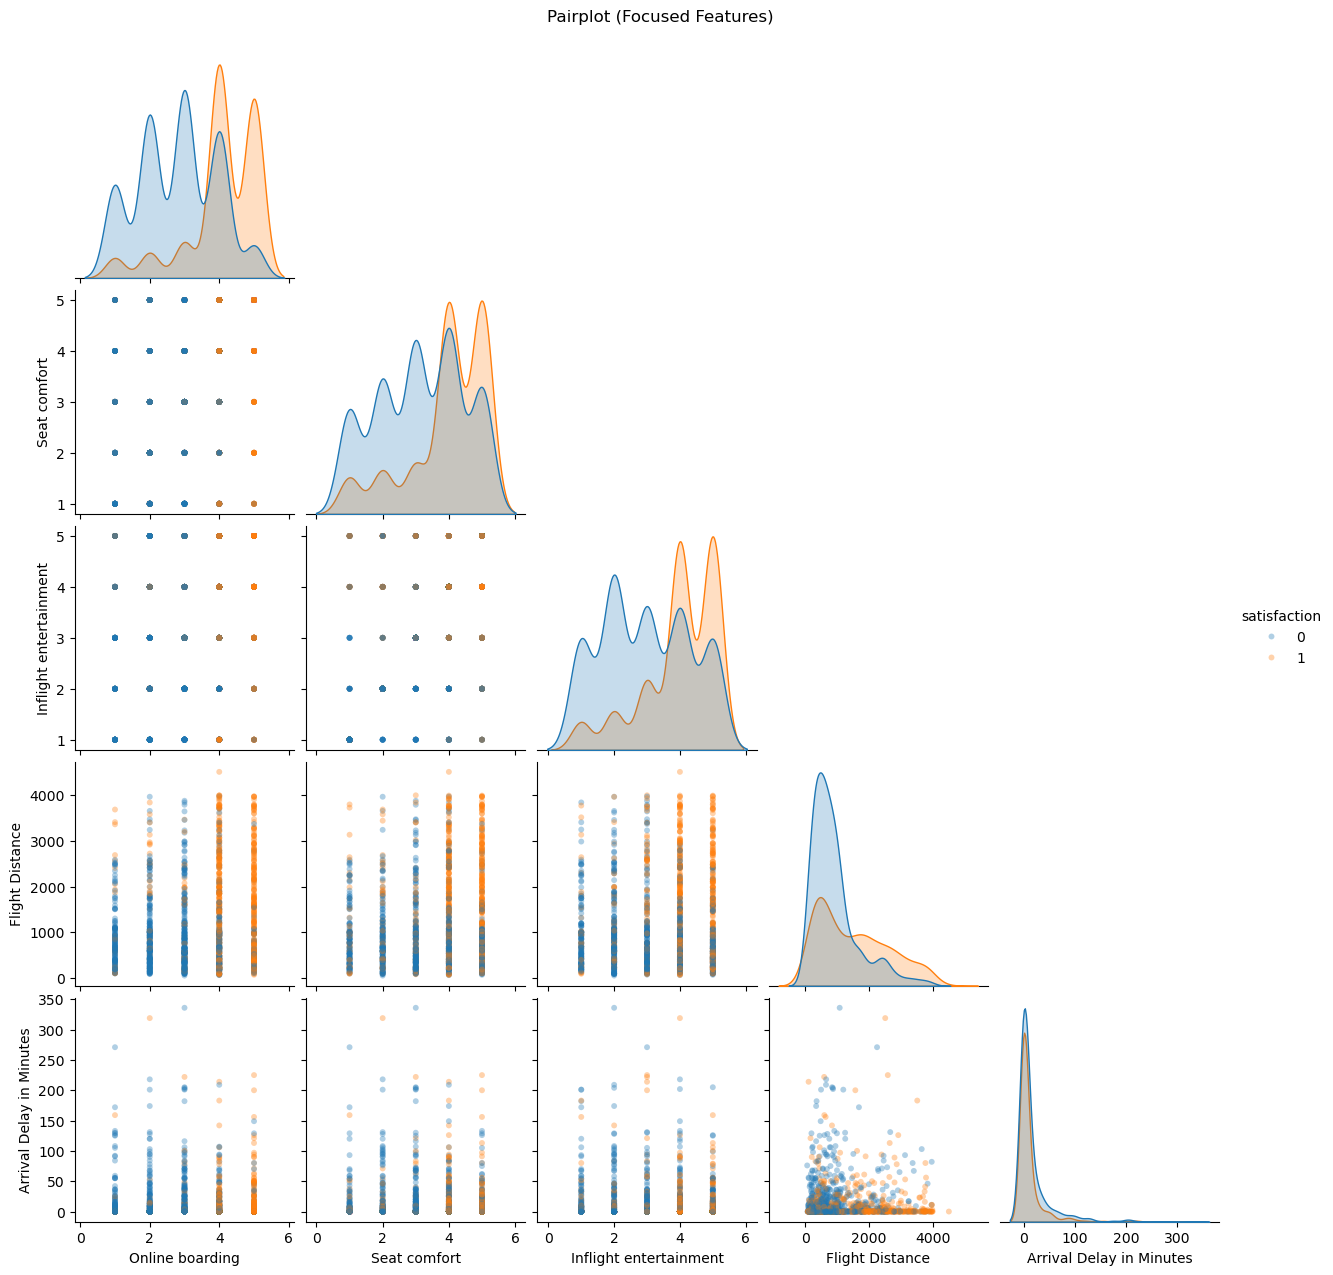

In [ ]:
# Pairplot (Top 5 Features vs Satisfaction)
top5 = [
    "Online boarding",
    "Inflight entertainment",
    "Seat comfort",
    "On-board service",
    "Cleanliness"
]

pair_cols = top5 + ["satisfaction"]

df_pair = df[pair_cols].sample(n=1500, random_state=42)

sns.pairplot(
    df_pair,
    hue="satisfaction",
    corner=True,
    diag_kind="kde",
    plot_kws={"alpha": 0.35, "s": 18, "edgecolor": "none"}
)
plt.suptitle("Pairplot (Top 5 Features vs Satisfaction)", y=1.02)
plt.show()


For this part, I had decided to plot a focused pairplot using the top 5 features that were most correlated with satisfaction (Online boarding, Inflight entertainment, Seat comfort, On‑board service, Cleanliness). It makes the plot cleaner and highlights the variables that matter most.

Key takeaways:

- From my observation, I can tell that the satisfied class clusters at higher service ratings, while the neutral/dissatisfied class appears more at lower ratings.

- There is clear visual separation between the two classes for these service‑quality features, which confirms they are strong predictors.

- The relationships are not perfectly linear, this suggests that tree‑based models can be used to capture these patterns well.



# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
# Mapping the target variable 
conversion_rules = {'neutral or dissatisfied': 0,  'satisfied': 1}
df['satisfaction'] = df['satisfaction'].map(conversion_rules)

I had decided to map my target variable as the first step of my data cleaning as most Machine Learning models expect the target to be numeric. Not to mention, doing this now also would make metrics such as confusion matrix and classficiation reports easier to interpret as well.

In [93]:
# Imputing missing values

# Separate feature columns from target
feature_df = df.drop(columns=["satisfaction"])

num_cols = feature_df.select_dtypes(include=["number"]).columns
cat_cols = feature_df.select_dtypes(exclude=["number"]).columns

# Numeric: fill with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical: fill with most frequent (mode)
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])



In this step, I had decided to address the missing values by imputing them with the median values for numerical data and mode values for the categorical data. I had decided to do it now as leaving missing values in the dataset will cause problems down the line when we are doing our models, as they cannot except missing values. For this, I had decided to impute median values as my replacement for the missing value over other values such as mean. This is because, due to the outliers that were earlier identified in the visualiation section, it may actually cause the mean values to be pulled upwards (By the really extreme outlier values). 

As for the categorical features, I had decided to impute the mode values instead, since categorical features do not really have meaningful average scores or median scores.

In [112]:
# Imputing median values into columns with 0
# We replace 0 with the median of that column to maintain distribution neutrality.

# List of columns that use the 1-5 rating scale
survey_columns = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

# Loop through each column and replace 0 with the median
for col in survey_columns:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)
    # Optional: Print to confirm changes
    print(f"Imputed 0s in {col} with median: {median_val}")

Imputed 0s in Inflight wifi service with median: 3.0
Imputed 0s in Departure/Arrival time convenient with median: 3.0
Imputed 0s in Ease of Online booking with median: 3.0
Imputed 0s in Gate location with median: 3.0
Imputed 0s in Food and drink with median: 3.0
Imputed 0s in Online boarding with median: 4.0
Imputed 0s in Seat comfort with median: 4.0
Imputed 0s in Inflight entertainment with median: 4.0
Imputed 0s in On-board service with median: 4.0
Imputed 0s in Leg room service with median: 4.0
Imputed 0s in Baggage handling with median: 4.0
Imputed 0s in Checkin service with median: 3.0
Imputed 0s in Inflight service with median: 4.0
Imputed 0s in Cleanliness with median: 3.0


As it was never stated within the dataset what the value 0 meant in the columns containing the values ranging from 1-5 (I called it the survey columns here), other than when it said that 0 meant "Not Applicable" for the inflight_wifi_service feature. I made the assumption that "Not Applicable" actually meant that they were not counted (Missing). So I treated them as missing values and imputed the median value of the column to replace the 0 values in all of the "survey_columns", as it may not only affect the mean value of the data, but also create a false signal that gives the impression that thosse 0 values mean the customers were "very dissatisfied".  Therefore, I did what i did in the above cell.

In [94]:
# One Hot Encoding categorical columns

categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

# 1. update X and y from the NEW encoded dataframe
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# 2. split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. checking the shape
print("Training Features Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)

Training Features Shape: (20780, 23)
Training Labels Shape: (20780,)


Split the dataset into 80 train and 20 test, and made sure to check the shape for any abnormal behaviour within the dataset

# 4. Modelling

### 4.2 Train Model

In [96]:
## Initialise and train model
from sklearn.linear_model import LogisticRegression

# Baseline: Logistic Regression
baseline_model = LogisticRegression(max_iter=5000)
baseline_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


For my first model, I had decided to make use of Logistic Regression as a baseline because it is not only efficient but also interpretable, and acts as a clear reference point for comparing more complex models

In [97]:
## Initialise Gradient Boosted Tree model
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(X_train, y_train)  # Train model

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


After initialising my baseline model, I had decided to go with initialising the Gradient Boosting model. As the idea of boosting is to turn weak learners into strong learners by adding trees sequentially, where every new tree focuses on correcting the errors of the previous ones. It can often deliver high predictive accuracy on the data. 

In [98]:
## Intiialise Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # Train model

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


I also decided to include the Random Forest model as even though it may not be the most accurate, it is still a robust ensemble that can reduce overfitting by averaging many trees. Not to mention it can handle noisy data well and performs consistently across many types of datasets.

In [99]:
## Initialise Decision Tree model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)  # Train model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Lastly, I had decided to include a Decision Tree because it is highly interpretable and shows how well a simple set of decision rules can separate "satisfied" vs. "dissatisfied" passengers. It acts as a clear, explainable comparator against the more complex ensemble learning models that I have initialised above.

# 5. Model Evaluation

In [100]:
## Evaluate model
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": baseline_model,
    "Gradient Boosting": gbt,
    "Random Forest": rf,
    "Decision Tree": dt
}

accuracy_results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred)
    })

accuracy_df = pd.DataFrame(accuracy_results)
accuracy_df


,Model,Accuracy
0,Logistic Regression,0.865666
1,Gradient Boosting,0.938222
2,Random Forest,0.951309
3,Decision Tree,0.928599


When evaluating the models that I had just set up in the previous part, I had first decided to go with checking each model's accuracy score. This is an important metric to check as it represents the percentage of correct predictions made, which can tell us roughly which model is performing the best so far.

In [101]:
## Classification Report
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": baseline_model,
    "Gradient Boosting": gbt,
    "Random Forest": rf,
    "Decision Tree": dt
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2945
           1       0.85      0.83      0.84      2251

    accuracy                           0.87      5196
   macro avg       0.86      0.86      0.86      5196
weighted avg       0.87      0.87      0.87      5196


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2945
           1       0.94      0.92      0.93      2251

    accuracy                           0.94      5196
   macro avg       0.94      0.94      0.94      5196
weighted avg       0.94      0.94      0.94      5196


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2945
           1       0.95      0.94      0.94      2251

    accuracy                           0.95      5196
   m

Seeing as only we are only checking the accuracy score of each model, I figured that that may not be the most ideal plan, as the other metrics might actually say otherwise. Therefore, I had decided to make use of the classification report, as it was able to return the value of other metrics such as the precision, recall, f1 score. From this, I am able to see that the best model thus far is still the Random Forest, as it's recall, precision and f1-score metrics are higher than all of the other models in this list.

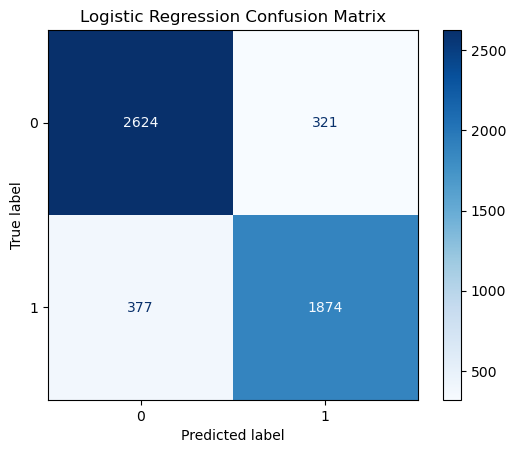

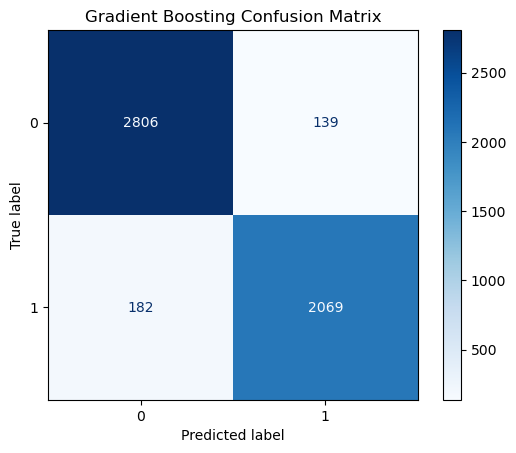

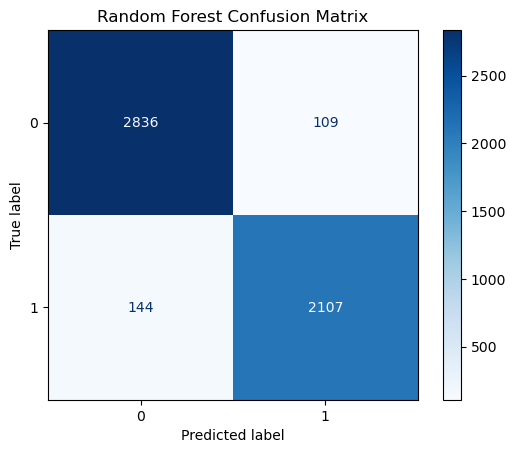

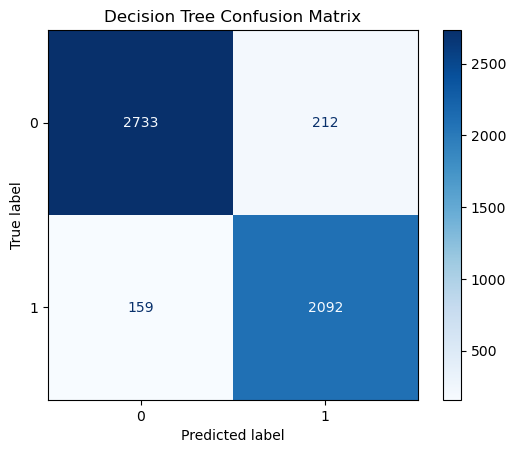

In [102]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {
    "Logistic Regression": baseline_model,
    "Gradient Boosting": gbt,
    "Random Forest": rf,
    "Decision Tree": dt
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

Last but not least, to further check which model is the best at the moment, I have to make use of a confusion matrix. From the output, I had learnt that the confusion matrix is useful because it shows exactly how many predictions were correct vs. incorrect for each class. It lets me measure misclassifications (Calculated by FP and FN), so I can see what kind of errors the model makes, not just how accurate it is overall.

In [104]:
## RandomizedSearchCV for Hyperparameter Tuning (Random Forest)

# Define parameter distribution
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
import joblib

param_dist_rf = {
    "n_estimators": randint(100, 501),      # 100 to 500 trees
    "criterion": ["gini", "entropy"],
    "max_depth": randint(5, 21),            # depth 5 to 20
    "min_samples_split": randint(2, 11),    # 2 to 10
    "max_features": ["sqrt", "log2"],
    "max_samples": uniform(0.6, 0.4)        # 0.6 to 1.0
}

rs_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    cv=5,
    scoring="accuracy",
    n_iter=20,
    n_jobs=-1,
    random_state=42
)

rs_rf.fit(X_train, y_train)

# Best parameters and estimator
best_rs_params = rs_rf.best_params_
best_rs_rf = rs_rf.best_estimator_
print("Best Parameters:", best_rs_params)

# Evaluate tuned model
y_pred_rs_rf = best_rs_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rs_rf))

# Save model
joblib.dump(best_rs_rf, "flight_satisfaction_best_rs_rf_model.pkl")


Best Parameters: {'criterion': 'gini', 'max_depth': 18, 'max_features': 'log2', 'max_samples': np.float64(0.9378135394712606), 'min_samples_split': 3, 'n_estimators': 466}
Tuned Random Forest Accuracy: 0.9491916859122402


['flight_satisfaction_best_rs_rf_model.pkl']

After I had properly evaluated the models that I have trained, I now decided to tune my Random Forest model as it was my best performing model thus far, and found out that RandomizedSearchCV actually produced a small loss in the accuracy score. However, this still tells me that the default Random Forest model was already near optimal for this dataset. However, with this in mind, I am considering tuning my second best model (Gradient Boosting) to see whether it would come close to my currently tuned Random Forest model.

In [105]:
## RandomizedSearchCV for Hyperparameter Tuning (Gradient Boosting)
param_dist_gb = {
    "n_estimators": randint(100, 401),     # number of trees
    "learning_rate": uniform(0.01, 0.19),  # 0.01 to 0.20
    "max_depth": randint(2, 6),            # depth 2 to 5
    "min_samples_split": randint(2, 11),   # 2 to 10
    "min_samples_leaf": randint(1, 6),     # 1 to 5
    "subsample": uniform(0.6, 0.4)         # 0.6 to 1.0
}

gb_base = GradientBoostingClassifier(random_state=42)

rs_gb = RandomizedSearchCV(
    estimator=gb_base,
    param_distributions=param_dist_gb,
    cv=5,
    scoring="accuracy",
    n_iter=20,
    n_jobs=-1,
    random_state=42
)

rs_gb.fit(X_train, y_train)

best_rs_gb = rs_gb.best_estimator_
print("Best Parameters:", rs_gb.best_params_)

y_pred_rs_gb = best_rs_gb.predict(X_test)
print("Tuned Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_rs_gb))


joblib.dump(best_rs_gb, "flight_satisfaction_best_rs_gb_model.pkl")


Best Parameters: {'learning_rate': np.float64(0.04950891594495588), 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 317, 'subsample': np.float64(0.7799016533479063)}
Tuned Gradient Boosting Accuracy: 0.9570823710546574


['flight_satisfaction_best_rs_gb_model.pkl']

After performing yet another RandomSearchCV on my second best performing model (Gradient Boosting) just to clarify my thoughts. I actually noticed a huge jump in it's accuracy score, increasing up to around 0.2 from it's original score of around 0.938 to now being around 0.957. This was actually a really good observation as through it, I actually realised that it now has a higher accuracy score than my Random Forest model. Now, I just have to make sure whether the scores of my classification report and my confusion matrix has also improved after the tuning has been done.

In [106]:
from sklearn.metrics import classification_report, confusion_matrix

tuned_models = {
    "Tuned Random Forest": best_rs_rf,
    "Tuned Gradient Boosting": best_rs_gb
}

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2945
           1       0.95      0.93      0.94      2251

    accuracy                           0.95      5196
   macro avg       0.95      0.95      0.95      5196
weighted avg       0.95      0.95      0.95      5196

Tuned Random Forest Confusion Matrix:
[[2833  112]
 [ 152 2099]]

Tuned Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2945
           1       0.96      0.94      0.95      2251

    accuracy                           0.96      5196
   macro avg       0.96      0.96      0.96      5196
weighted avg       0.96      0.96      0.96      5196

Tuned Gradient Boosting Confusion Matrix:
[[2853   92]
 [ 131 2120]]


After I had found out that my accuracy score for Gradient Boosting had actually become better than my Random Forest model, I decided to run one last check, which was to check whether the scores of my Classification Report and Confusion Matrix actually increased as well. The output above shows that actually my Gradient Boosting's Precision, Recall, and F1 score are all now better than my Random Forest, not forgetting the fact that there are also now less misclassifications within my Gradient Boosting as well (Seen through confusion matrix), which can be seen from the lower number of false positives in my Gradient Boosting in comparison to my Random Forest.

With all of that in mind, I have decided that the model that I am going to be proceeding with is the Gradient Boosting model, as even though it was losing to random forest initially in terms of all the metrics, it was able still able to increase after all of the hyperparameter tuning has been completed. 

## Iterative model development


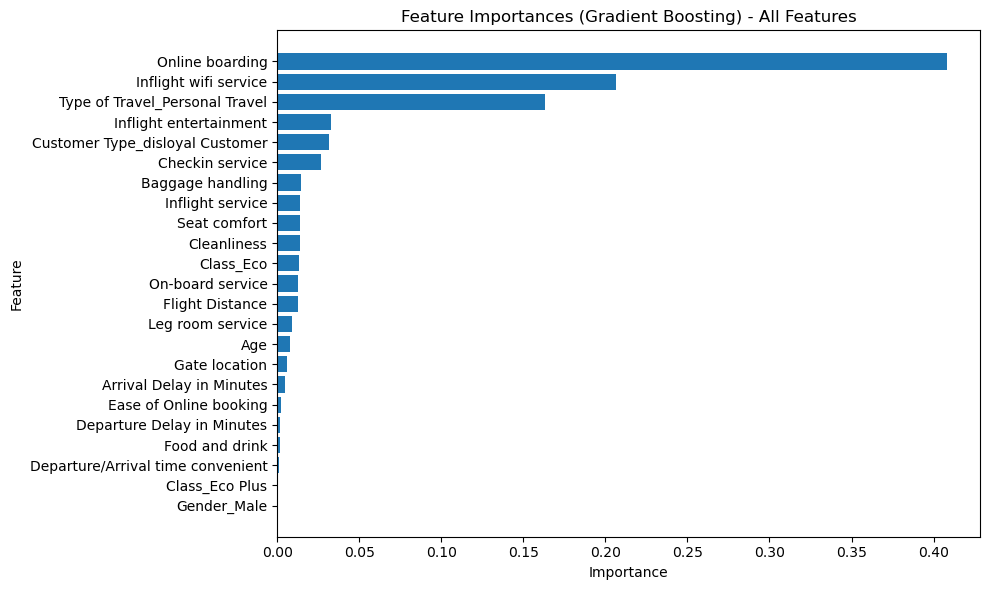

In [ ]:
## Further feature engineering / feature selection
# Feature Importance Plot for Gradient Boosting (All Features) to check the least important features

model = best_rs_gb 

importances = model.feature_importances_
feature_names = X.columns

fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, max(6, 0.25 * len(fi_df))))
plt.barh(fi_df["Feature"], fi_df["Importance"])
plt.title("Feature Importances (Gradient Boosting) - All Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [113]:
# Create a separate feature set for experimentation (does not affect above)
X_fe = X.copy()

drop_cols = [
    "Ease of Online booking",
    "Departure Delay in Minutes",
    "Food and drink",
    "Departure/Arrival time convenient",
    "Class_Eco Plus",
    "Gender_Male"
]

X_fe = X_fe.drop(columns=drop_cols)

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe, y, test_size=0.2, random_state=42
)

In [115]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train new models on the feature‑engineered data
gbt_fe = GradientBoostingClassifier(random_state=42)
rf_fe  = RandomForestClassifier(random_state=42)
dt_fe  = DecisionTreeClassifier(random_state=42)
lr_fe  = LogisticRegression(max_iter=5000)

gbt_fe.fit(X_train_fe, y_train_fe)
rf_fe.fit(X_train_fe, y_train_fe)
dt_fe.fit(X_train_fe, y_train_fe)
lr_fe.fit(X_train_fe, y_train_fe)

models_fe = {
    "LR (FE)": lr_fe,
    "GB (FE)": gbt_fe,
    "RF (FE)": rf_fe,
    "DT (FE)": dt_fe
}

# Accuracy
for name, model in models_fe.items():
    y_pred_fe = model.predict(X_test_fe)
    print(f"{name} Accuracy: {accuracy_score(y_test_fe, y_pred_fe):.4f}")

# Classification report + confusion matrix
for name, model in models_fe.items():
    y_pred_fe = model.predict(X_test_fe)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test_fe, y_pred_fe))
    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test_fe, y_pred_fe))


LR (FE) Accuracy: 0.8647
GB (FE) Accuracy: 0.9378
RF (FE) Accuracy: 0.9525
DT (FE) Accuracy: 0.9299

LR (FE) Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2945
           1       0.85      0.84      0.84      2251

    accuracy                           0.86      5196
   macro avg       0.86      0.86      0.86      5196
weighted avg       0.86      0.86      0.86      5196

LR (FE) Confusion Matrix:
[[2606  339]
 [ 364 1887]]

GB (FE) Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2945
           1       0.94      0.92      0.93      2251

    accuracy                           0.94      5196
   macro avg       0.94      0.94      0.94      5196
weighted avg       0.94      0.94      0.94      5196

GB (FE) Confusion Matrix:
[[2803  142]
 [ 181 2070]]

RF (FE) Classification Report:
              precision    recall  f1-score 

Looking through scores of the Feature Engineering that I have just worked on (Dropping the not so important features). I realised that when looking at the scores of my Feature Engineered Gradient Boosting Model (The model that I have chosen), it actually dropped the accuracy score from the original Gradient Boosting Model that I had evaluated in the "Model Evaluation" section (It went from 0.9382 to 0.9378).

Not to mention, the newer feature engineered Gradient Boosting Confusion Matrix scores are slightly worse, as it introduced 2 more misclassifications (Calculated through FP + FN) in comparison to the original one.

Lastly, another observation was that the Classification Report output actually still remained the same across both the original Gradient Boosting untuned model VS the newly feature engineered Gradient Boosting model.

What this tells me is that even after dropping the not so important features, it actually did not do much to improve the scores of my Gradient Boosting Model (The model that I have ultimately chosen), which was actually kind of expected considering my scores were already quite high. However, because of that, I find this further feature engineering implementation to be rather useless and will not be using it.

In [119]:
## Second Feature Engineering -- Outlier Removal using IQR method

# Create a copy so nothing above changes
df_out = df.copy()

# Choose continuous numeric columns only
continuous_cols = [
    "Flight Distance",
    "Departure Delay in Minutes",
    "Arrival Delay in Minutes"
]

# IQR-based outlier removal
for col in continuous_cols:
    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_out = df_out[(df_out[col] >= lower) & (df_out[col] <= upper)]

In [120]:
# build new feature set from outlier-removed data
X_out = df_out.drop("satisfaction", axis=1)
y_out = df_out["satisfaction"]

# train/test split for this outlier version
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(
    X_out, y_out, test_size=0.2, random_state=42
)


In [122]:
# Train new models on the outlier-removed data
gbt_out = GradientBoostingClassifier(random_state=42)
rf_out  = RandomForestClassifier(random_state=42)
dt_out  = DecisionTreeClassifier(random_state=42)
lr_out  = LogisticRegression(max_iter=5000)

gbt_out.fit(X_train_out, y_train_out)
rf_out.fit(X_train_out, y_train_out)
dt_out.fit(X_train_out, y_train_out)
lr_out.fit(X_train_out, y_train_out)

models_out = {
    "LR (Outlier-Removed)": lr_out,
    "GB (Outlier-Removed)": gbt_out,
    "RF (Outlier-Removed)": rf_out,
    "DT (Outlier-Removed)": dt_out
}

# Accuracy
for name, model in models_out.items():
    y_pred_out = model.predict(X_test_out)
    print(f"{name} Accuracy: {accuracy_score(y_test_out, y_pred_out):.4f}")

# Classification report + confusion matrix
for name, model in models_out.items():
    y_pred_out = model.predict(X_test_out)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test_out, y_pred_out))
    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test_out, y_pred_out))


LR (Outlier-Removed) Accuracy: 0.8853
GB (Outlier-Removed) Accuracy: 0.9290
RF (Outlier-Removed) Accuracy: 0.9391
DT (Outlier-Removed) Accuracy: 0.9155

LR (Outlier-Removed) Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2021
           1       0.87      0.88      0.88      1754

    accuracy                           0.89      3775
   macro avg       0.88      0.88      0.88      3775
weighted avg       0.89      0.89      0.89      3775

LR (Outlier-Removed) Confusion Matrix:
[[1798  223]
 [ 210 1544]]

GB (Outlier-Removed) Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2021
           1       0.94      0.91      0.92      1754

    accuracy                           0.93      3775
   macro avg       0.93      0.93      0.93      3775
weighted avg       0.93      0.93      0.93      3775

GB (Outlier-Removed) Confusion Matrix:

After seeing the results of my outlier removal feature engineering, I noticed that actually even after deleting the outliers from some of the features that we found during the EDA section. Instead of improving our evaluation scores, it actually caused my gradient boosting's model to drop in it's accuracy score, classification report, and the confusion matrix.

For the accuracy score, the original untuned Gradient Boosting (The model that I chose) score was 0.938, meanwhile now it is at 0.929. Which is nearly a 0.10 drop in the accuracy score. 

As for the classification report, the false values in the original untuned Gradient Boosting model from the Model Evaluation section had an accuracy score that was 0.10 higher (0.94 vs 0.93) and a precision + F1 score that was 0.20 higher than the new model with the outliers dropped (0.94 to 0.92 for precision and 0.95 to 0.93). The only thing that remained the same was the recall. However, when we look at the true portion, we can actually see that the recall and the f1-score both decreased by 0.10 in the newer model without the outlier data, when compared to the original one.

Lastly, when we look at the confusion matrix, we will actually start to notice that the total error rates is higher on the model with the outlier-removed values. This was calculated using the FP+FN/Total formula. When you calculate all of them, you would realise that the outlier removed values would be 268/3775 = 7.10% (3775 since we removed outliers) vs 321/5196 = 6.18% (the original boosting model).

With all these observations in mind, I realised that there was absolutely no reason for me to drop the outliers as it would only make my evaluation scores worse, especially for my Gradient Boosting model. This has also helped me to understand that these outliers actually have a purpose, and can be more useful if left within the dataset